In [1]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
import pyspark.sql.types as T

In [2]:
spark = SparkSession.builder.appName("engine").getOrCreate()

# Read

## Read Csv

In [5]:
# read the csv file
df_csv = spark.read.csv("/home/jovyan/develop/csv/olist_customers_dataset.csv", inferSchema=True, header=True)

In [6]:
df_csv.show()

+--------------------+--------------------+------------------------+--------------------+--------------+
|         customer_id|  customer_unique_id|customer_zip_code_prefix|       customer_city|customer_state|
+--------------------+--------------------+------------------------+--------------------+--------------+
|06b8999e2fba1a1fb...|861eff4711a542e4b...|                   14409|              franca|            SP|
|18955e83d337fd6b2...|290c77bc529b7ac93...|                    9790|sao bernardo do c...|            SP|
|4e7b3e00288586ebd...|060e732b5b29e8181...|                    1151|           sao paulo|            SP|
|b2b6027bc5c5109e5...|259dac757896d24d7...|                    8775|     mogi das cruzes|            SP|
|4f2d8ab171c80ec83...|345ecd01c38d18a90...|                   13056|            campinas|            SP|
|879864dab9bc30475...|4c93744516667ad3b...|                   89254|      jaragua do sul|            SC|
|fd826e7cf63160e53...|addec96d2e059c80c...|            

In [7]:
df.printSchema()

root
 |-- customer_id: string (nullable = true)
 |-- customer_unique_id: string (nullable = true)
 |-- customer_zip_code_prefix: integer (nullable = true)
 |-- customer_city: string (nullable = true)
 |-- customer_state: string (nullable = true)



# Dataframe

Un DataFrame es una estructura de datos tabular distribuida y tolerante a fallos en PySpark, diseñada para manejar grandes volúmenes de datos de manera eficiente. Se basa en el concepto de DataFrames que se encuentran en muchos otros entornos de análisis de datos, como R y Python (pandas), pero está optimizado para trabajar en entornos distribuidos utilizando el framework Apache Spark.

sparkSession: Es el punto de entrada que me permite acceder a todo
.builder(): hace referencia a crear una session
appName("engine"): Darle una etiqueta a tu session para distinguirla
getOrCreate(): Verificar que tu spark session este activa 



### Nota: Spark solo te permite crear una sola session por la arqutecura

# 📄 Read Json

Por que los archivos json no los lee tan rapido como el el formato csv,
esto es porque en json denecita configurarse como tipo multilinea.

con la opcion: spark.read.options("multiline"=True)

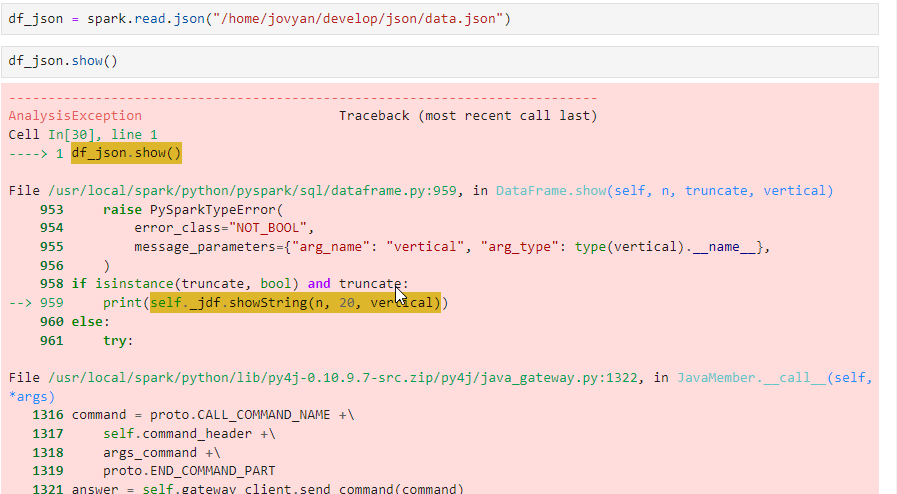

In [8]:
df_json = spark.read.option("multiline", "true").json("/home/jovyan/develop/json/data_ejemplo.json")

In [9]:
df_json.show()

+-------------------+------------+-----+-----------+-------+
|               City|RecordNumber|State|ZipCodeType|Zipcode|
+-------------------+------------+-----+-----------+-------+
|PASEO COSTA DEL SUR|           2|   PR|   STANDARD|    704|
|       BDA SAN LUIS|          10|   PR|   STANDARD|    709|
+-------------------+------------+-----+-----------+-------+



# 📄 Read Text

In [14]:
path_text = "/home/jovyan/develop/txt/data_ejemplo.txt"
df_text = spark.read.csv(path_text, header=True)

In [15]:
df_text.show()

+-------+---+-------------+----------+------+
|   name|age|         city|occupation|salary|
+-------+---+-------------+----------+------+
|  Alice| 30|     New York|  Engineer|120000|
|    Bob| 25|  Los Angeles|  Designer| 80000|
|Charlie| 35|      Chicago|   Teacher| 60000|
|  David| 40|        Miami|   Manager| 95000|
|    Eva| 28|San Francisco| Developer|115000|
+-------+---+-------------+----------+------+



# ✍️ Write

In [21]:
df_json.show()

+-------------------+------------+-----+-----------+-------+
|               City|RecordNumber|State|ZipCodeType|Zipcode|
+-------------------+------------+-----+-----------+-------+
|PASEO COSTA DEL SUR|           2|   PR|   STANDARD|    704|
|       BDA SAN LUIS|          10|   PR|   STANDARD|    709|
+-------------------+------------+-----+-----------+-------+



In [17]:
# df_json.write.parquet("temp", mode="overwrite")

In [18]:
# obtener el numero de particiones
# spark lee el arhcivo lo lee en ram y solo lo tiene en tres partes
# spark lo paraleliza y lo
# df_json.rdd.getNumPartitions()

1

In [22]:
df_json.write.partitionBy("city").parquet("temp", mode="overwrite")

In [ ]:
# como quiero que solo haga las repaticiones que yo quiero
df = repartition(1).write.parquet("ruta",mode="override - append")

In [ ]:
# saprk trata de agruypar la informacion, simepre podemos darle un aforma de particioanr por iuna columna
df.partitionBy("occupation").write.parquet("ruta", mode="override")